In [1]:
import os
import sys
import json
import warnings

import numpy as np

sys.path.insert(0, '/mnt/d/projects/bassline_transcription') 

import plotting as plot
from bassline_transcriber import transcription
from utilities import *
from signal_processing import *

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Initialization

## Directories

output_dir = os.path.join('..','data','transcription_test')
clip_dir = os.path.join(output_dir,'audio_clips')
metadata_dir = os.path.join(output_dir,'metadata')

In [3]:
directories = get_directories('../data/directories.json')
#directories = get_directories(os.path.join(output_dir,'directories.json'))

scales, track_dicts, track_titles = read_metadata(directories['extraction'], 'TechHouse_track_dicts.json')

# Listening and Waveform Inspection

Select a track to work with

John Summit - Make Me Feel (Original Mix)
BPM: 126.0

		John Summit - Make Me Feel (Original Mix)

Chorus

Fs = 44100, x.shape = (336043,), x.dtype = float32


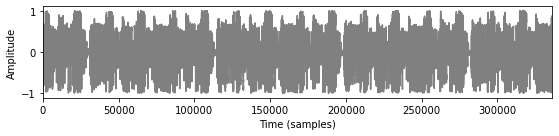

Bassline

Fs = 44100, x.shape = (336043,), x.dtype = float64


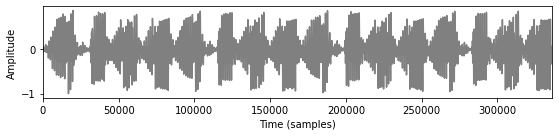

In [5]:
#title = track_titles[np.random.randint(len(track_titles))]

title = track_titles[0]
BPM = float(track_dicts[title]['BPM'])
beat_length = 60/BPM
print('{}\nBPM: {}\n'.format(title, BPM))

quarter_beat_positions = get_quarter_beat_positions(get_chorus_beat_positions(title, directories))
    
track_scale = get_track_scale(title, track_dicts, scales)

fs = 44100
chorus, bassline = load_chorus_and_bassline(title, directories) # read the chorus and the bassline
inspect_audio_outputs(title, directories, fs)

# Spectrogram Calculation

Calculate the spectrograms of the chorus and the bassline here.

In [6]:
center=True
n_fft = 4096*8

spectrogram_beat_factor = 8
win_length = int((beat_length/spectrogram_beat_factor)*fs) 
hop_length = int(win_length/4) 

bassline_spectrogram = extract_dB_spectrogram(bassline, n_fft, win_length, hop_length, center=center)

# Plots

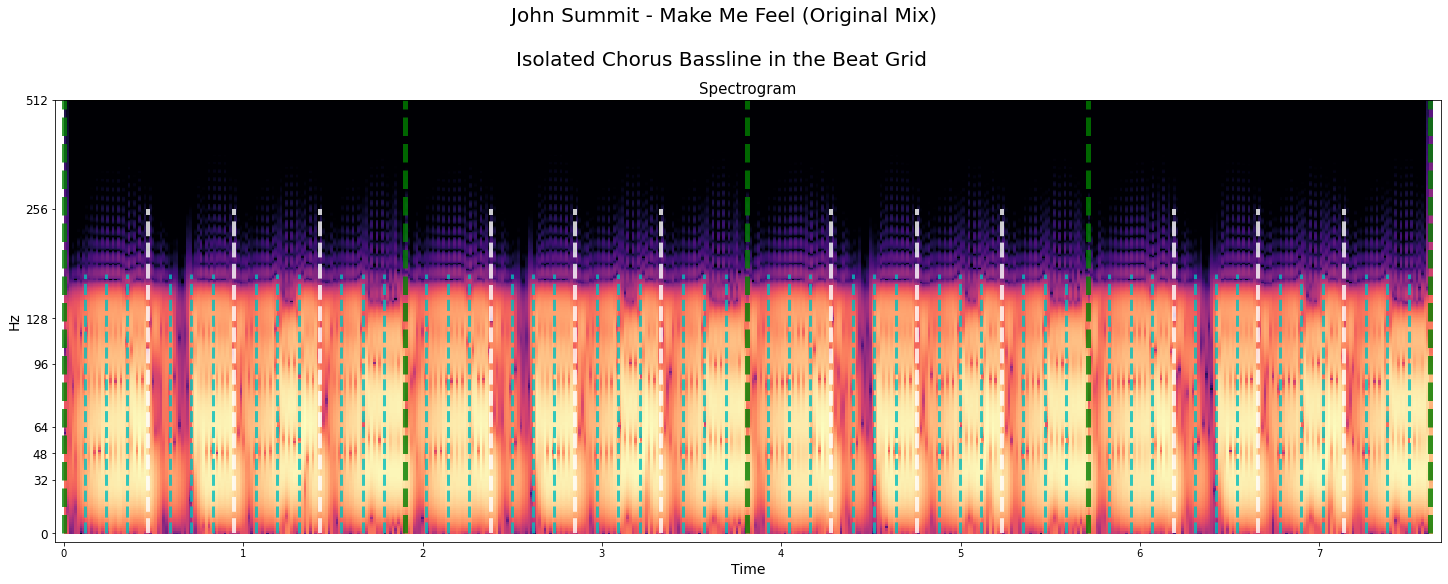

In [7]:
plot.spectrogram(title, directories, bassline_spectrogram, fs, hop_length) #, pitch_track_quantized)

In [ ]:
plot.waveform_and_note_spectrogram(title, directories,
                                   bassline, bassline_spectrogram,
                                   fs, hop_length,
                                   bassline_notes, unk_bassline_notes,
                                   save=False)

In [ ]:
plot.note_spectrogram(title, directories,
                      bassline_spectrogram,
                      fs, hop_length,
                      bassline_notes, unk_bassline_notes)

In [ ]:
print_plot_play(chorus, fs, title)

In [ ]:
plot.note_comparison_spectrogram(title, directories,
                                 bassline_spectrogram,
                                 fs, hop_length,
                                 F0_estimate, bassline_notes,
                                 unk_bassline_notes,
                                 save=False, plot_title='')